In [187]:
import pandas as pd
import numpy as np

In [188]:
file = open('adult.data', 'r')

In [189]:
def chr_int(a):
    if a.isdigit():
        return int(a)
    else:
        return 0
                
data=[]
for line in file:
     data1=line.split(', ')
     if len(data1)==15:
        data.append([chr_int(data1[0]),data1[1],chr_int(data1[2]),data1[3],chr_int(data1[4]),data1[5],data1[6],\
            data1[7],data1[8],data1[9],chr_int(data1[10]),chr_int(data1[11]),chr_int(data1[12]),data1[13],\
            data1[14]])

In [190]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(data) #  Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes 

df.columns = ['age', 'type_employer', 'fnlwgt', 'education', 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country","income"]
df.head()


,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [191]:
# consider age attribute, select 10 random rows, compute the mean(x_bar) of the age attribute then compare it with the mean(mu) of the entire dataset for the same attribute
# dont use random.seed for rnadom, use loops
# compare the mean of the sample with the mean of the entire dataset and if it is equal to the mean of the entire dataset, then stop, else continue by increasing the sample size by 1




mu = np.round(df['age'].mean(),0)

sample_size = 10
samples_used = []


while True:
    sample_rows = df.sample(n=sample_size)
    samples_used.append(sample_rows)

    x_bar =np.round(sample_rows['age'].mean(),0)

    print(f"Sample size: {sample_size}, Sample mean: {x_bar}, Dataset mean: {mu}, Values: {sample_rows['age'].values}")
    if np.array_equal(x_bar, mu):
        print("Sample mean is equal to dataset mean.")
        break
    
    sample_size += 1

print(f"Final sample size: {sample_size}, Sample mean: {np.round(x_bar,3)}, Dataset mean: {np.round(mu,3)}")

dataset_size = df['age'].count()

print(f"Percentage of dataset used: {np.round(sample_size/dataset_size*100, 5)}%")

Sample size: 10, Sample mean: 34.0, Dataset mean: 39.0, Values: [20 28 22 29 54 36 22 41 28 63]
Sample size: 11, Sample mean: 31.0, Dataset mean: 39.0, Values: [22 17 20 20 19 60 50 29 36 39 34]
Sample size: 12, Sample mean: 49.0, Dataset mean: 39.0, Values: [54 40 39 31 30 75 79 53 24 50 74 35]
Sample size: 13, Sample mean: 40.0, Dataset mean: 39.0, Values: [27 43 48 38 25 23 23 28 48 48 42 49 82]
Sample size: 14, Sample mean: 44.0, Dataset mean: 39.0, Values: [45 55 24 44 42 51 28 47 58 63 20 51 26 55]
Sample size: 15, Sample mean: 43.0, Dataset mean: 39.0, Values: [64 42 53 25 74 30 39 38 45 47 25 55 43 32 34]
Sample size: 16, Sample mean: 35.0, Dataset mean: 39.0, Values: [51 28 25 18 32 42 17 38 50 37 37 43 57 25 27 27]
Sample size: 17, Sample mean: 37.0, Dataset mean: 39.0, Values: [17 38 22 38 31 50 39 30 42 29 56 18 48 45 36 33 50]
Sample size: 18, Sample mean: 36.0, Dataset mean: 39.0, Values: [35 58 61 35 48 51 25 18 20 52 46 33 22 21 28 53 23 26]
Sample size: 19, Sample mean

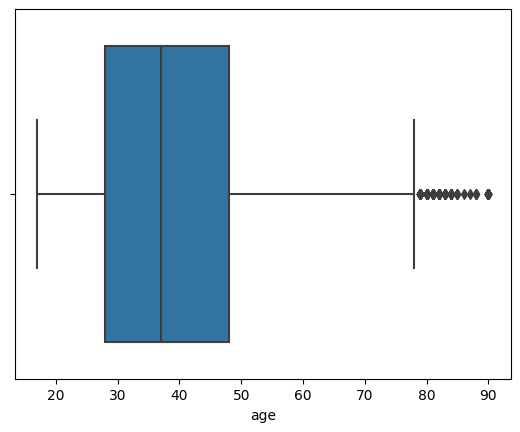

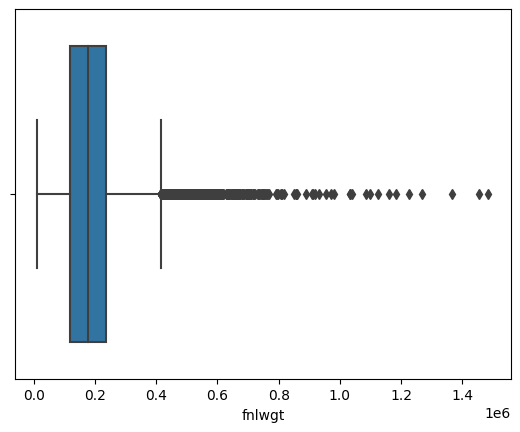

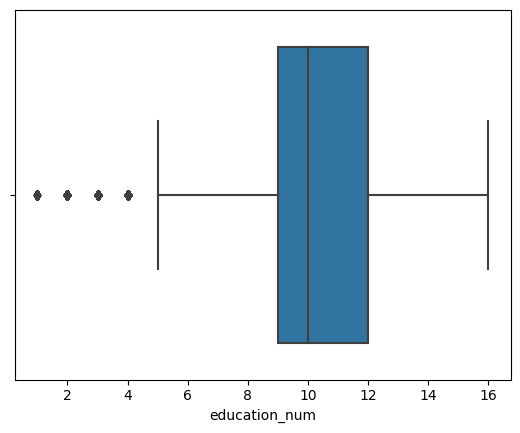

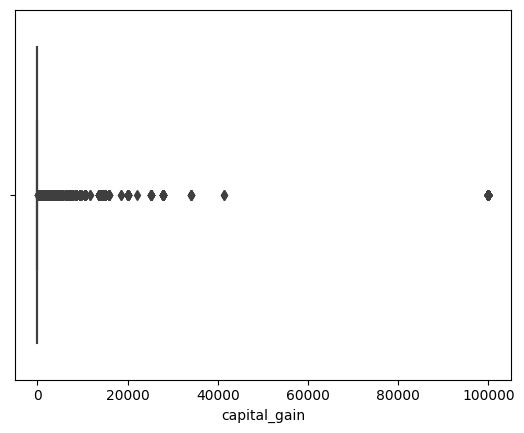

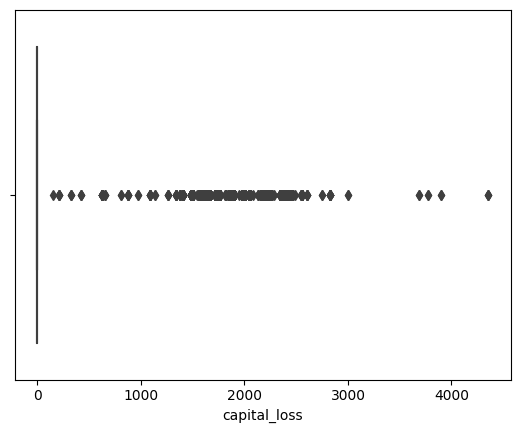

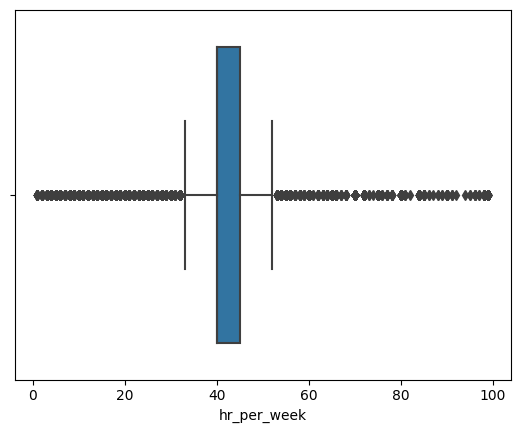

In [192]:
# box plot of every attribute in the dataset separately. use for loop

import matplotlib.pyplot as plt
import seaborn as sns

for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure()
    sns.boxplot(x=df[col])


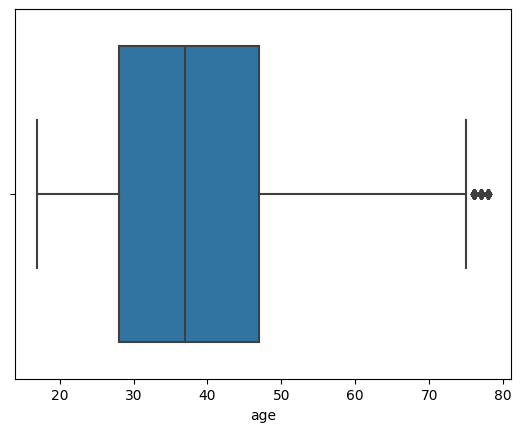

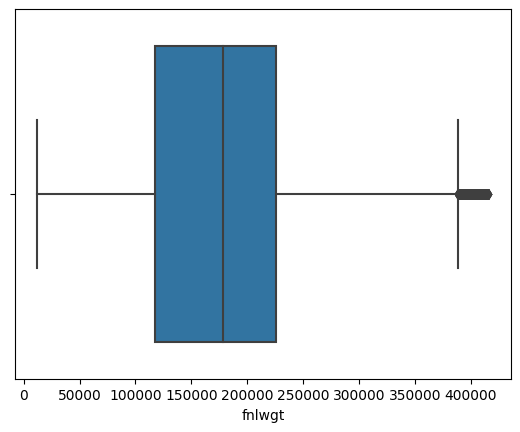

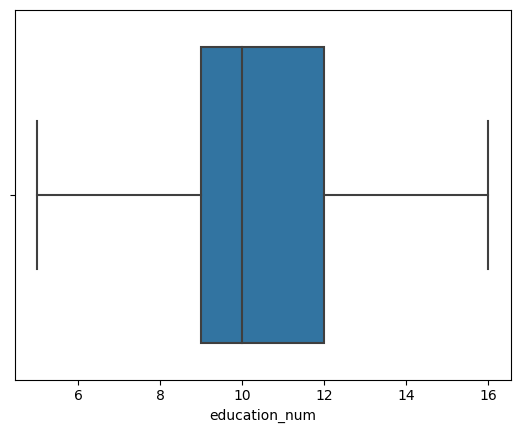

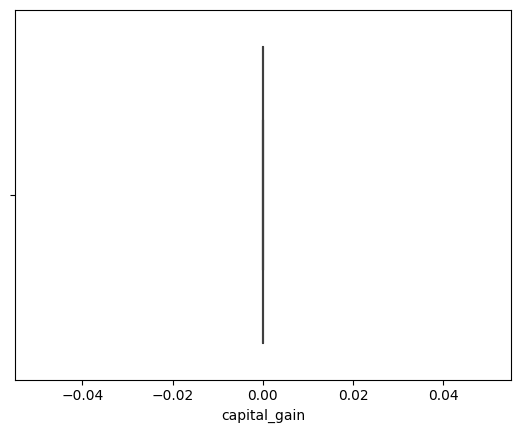

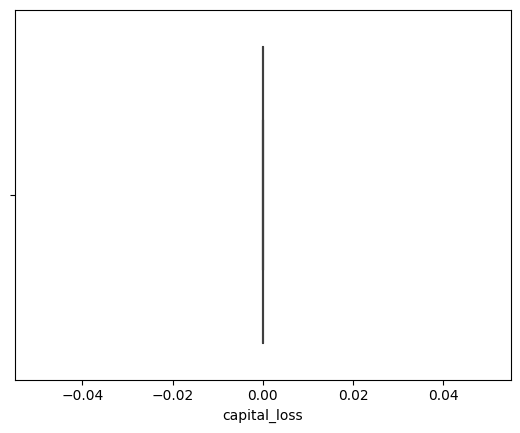

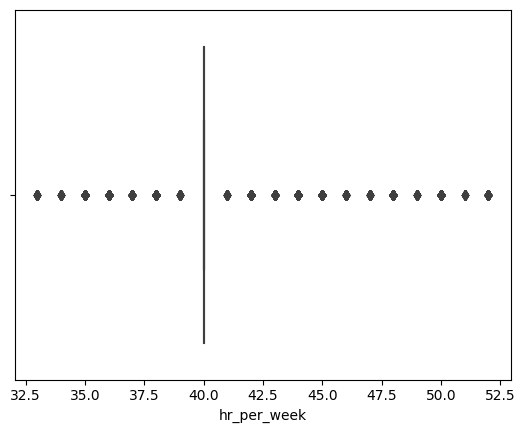

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to replace outliers with column median
def replace_outliers_with_median(series):
    median = series.median()
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    series = np.where((series < lower_bound) | (series > upper_bound), median, series)
    return series

# Replace missing values with median
for col in df.select_dtypes(include=[np.number]).columns:
    median = df[col].median()
    df[col] = df[col].fillna(median)
    df[col] = replace_outliers_with_median(df[col])


# Plot box plots
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure()
    sns.boxplot(x=df[col])


In [194]:
# Consider the numeric columns of the dataset, apply the Z-scale formula and apply it on the numeric columns of the dataset. Find the mean and standard deviation of the numeric columns and compute the percentage of data within 1, 2, and 3 Standard deviation. [hint: Mean+/-1SD]

for col in df.select_dtypes(include=[np.number]).columns:
    mean = df[col].mean()
    std = df[col].std()
    within_1 = df[(df[col] > mean - std) & (df[col] < mean + std)].shape[0] / df.shape[0] * 100
    within_2 = df[(df[col] > mean - 2*std) & (df[col] < mean + 2*std)].shape[0] / df.shape[0] * 100
    within_3 = df[(df[col] > mean - 3*std) & (df[col] < mean + 3*std)].shape[0] / df.shape[0] * 100
    print(f"Column: {col}, Mean: {mean}, Standard Deviation: {std}, Within 1SD: {within_1}, Within 2SD: {within_2}, Within 3SD: {within_3}")


Column: age, Mean: 38.37554129172937, Standard Deviation: 13.300890727184758, Within 1SD: 62.73763090814164, Within 2SD: 96.33610761340253, Within 3SD: 100.0
Column: fnlwgt, Mean: 179592.4847824084, Standard Deviation: 86028.73708294865, Within 1SD: 68.61889991093639, Within 2SD: 95.79251251497189, Within 3SD: 100.0
Column: education_num, Mean: 10.326679156045577, Standard Deviation: 2.2014075365096115, Within 1SD: 65.84257240256748, Within 2SD: 95.38404840146187, Within 3SD: 100.0
Column: capital_gain, Mean: 0.0, Standard Deviation: 0.0, Within 1SD: 0.0, Within 2SD: 0.0, Within 3SD: 0.0
Column: capital_loss, Mean: 0.0, Standard Deviation: 0.0, Within 1SD: 0.0, Within 2SD: 0.0, Within 3SD: 0.0
Column: hr_per_week, Mean: 41.1324283652222, Standard Deviation: 3.486499801046014, Within 1SD: 77.87537237799822, Within 2SD: 90.583827278032, Within 3SD: 99.57618009274898
